In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_csv('iris_csv.csv')

In [ ]:
df.shape

(150, 5)

In [ ]:
df.head(10)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


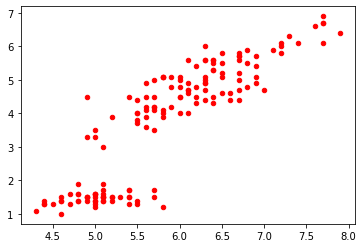

In [ ]:
plt.scatter(df.sepallength,df.petallength,color = 'r',s=20)

In [ ]:
km = KMeans(n_clusters=3,max_iter=400,random_state=0)
km

KMeans(max_iter=400, n_clusters=3, random_state=0)

In [ ]:
 y_predicted = km.fit_predict(df[['sepallength','petallength']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
df['cluster']= y_predicted
df.head(-10)

,sepallength,sepalwidth,petallength,petalwidth,class,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
135,7.7,3.0,6.1,2.3,Iris-virginica,1
136,6.3,3.4,5.6,2.4,Iris-virginica,1
137,6.4,3.1,5.5,1.8,Iris-virginica,1
138,6.0,3.0,4.8,1.8,Iris-virginica,2


In [ ]:
km.cluster_centers_

array([[5.00784314, 1.49411765],
       [6.83902439, 5.67804878],
       [5.87413793, 4.39310345]])

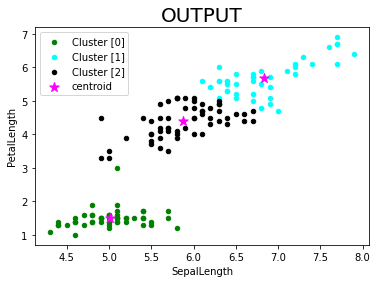

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.sepallength,df1.petallength,color='green',label='Cluster [0]',s=20)
plt.scatter(df2.sepallength,df2.petallength,color='cyan',label='Cluster [1]',s=20)
plt.scatter(df3.sepallength,df3.petallength,color='black',label='Cluster [2]',s=20)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='magenta',marker='*',label='centroid',s=100)
plt.title('OUTPUT',fontsize=20)
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.legend()

In [ ]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['sepallength','petallength']])
  sse.append(km.inertia_)

In [ ]:
sse

[566.0320666666667,
 112.96262731481481,
 53.801351193126536,
 34.31442077922078,
 25.63146450956451,
 21.821878612128614,
 18.323205046520265,
 15.237380036630036,
 13.54520357858516]

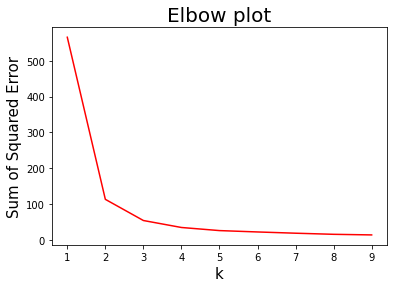

In [ ]:
plt.xlabel('k',fontsize=15)
plt.ylabel('Sum of Squared Error',fontsize=15)
plt.title('Elbow plot',fontsize=20)
plt.plot(k_rng,sse, color='r')